In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,Adagrad,SGD , Adadelta, RMSprop
from keras.initializers import random_uniform, random_normal, he_uniform, he_normal, glorot_uniform, glorot_normal

In [3]:
x,y = make_circles(n_samples=1000, noise=0.1, random_state= None)
x

array([[-0.99568298, -0.08565174],
       [ 0.89569794, -0.47807197],
       [-0.82581028, -0.22485789],
       ...,
       [ 1.11840527,  0.36873964],
       [-0.87823982, -0.59926905],
       [ 0.62541865, -0.92395669]])

In [4]:
y

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

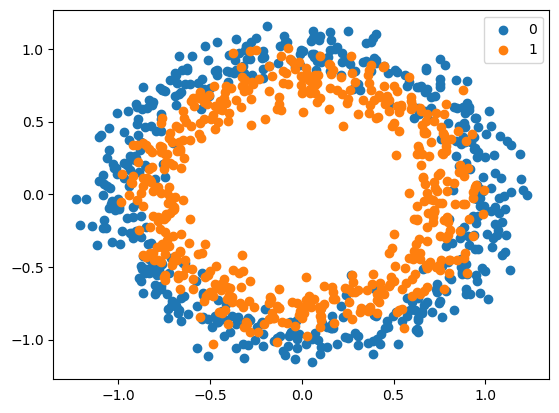

In [5]:
for i in range(2):
    samples=np.where(y==i)
    plt.scatter(x[samples,0], x[samples, 1], label=str(i))
plt.legend();

In [6]:
scale=MinMaxScaler()
x_trans=scale.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y , test_y = train_test_split(x_trans,y, test_size=0.4, random_state=0)

In [8]:
model= Sequential()
model.add(Dense(5,activation='tanh', input_dim=2, kernel_initializer=random_uniform(minval=0, maxval=1)))
model.add(Dense(1,activation='sigmoid', kernel_initializer=random_uniform(minval=0, maxval=1)))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [10]:
opt = SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=opt, loss="binary_crossentropy", metrics="accuracy")

In [11]:
history=model.fit(train_x, train_y, verbose=0, epochs=500, validation_data=(test_x,test_y))

In [12]:
key=history.history.keys()
key

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
for i in key:
    print(i, history.history[i][-1])

loss 0.4848172068595886
accuracy 0.7766666412353516
val_loss 0.46429991722106934
val_accuracy 0.8075000047683716


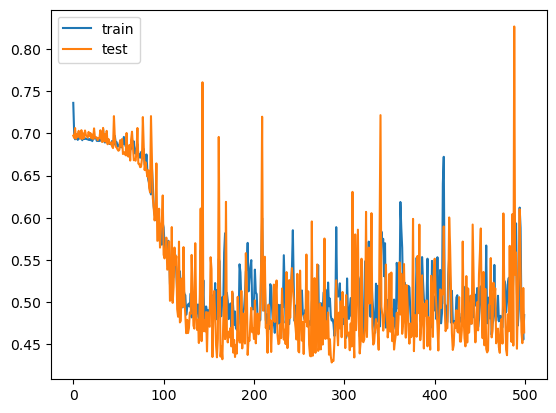

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

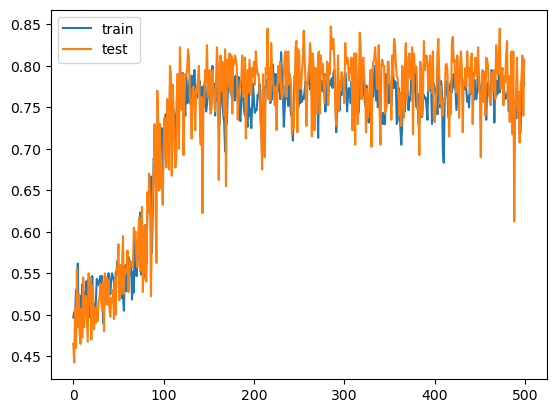

In [15]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()

In [16]:
data=pd.read_csv("pima-indians-diabetes.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
x=data.iloc[:,:8]
y=data[8]


In [18]:
data.shape

(768, 9)

In [19]:
from sklearn.model_selection import GridSearchCV
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [20]:
def create_net(activation="tanh", kernel_initializer="random_uniform", neurons=12, drop_prob=0.2, optimizer='adam'):
    model2=Sequential()
    model2.add(Dense(neurons, activation= activation, kernel_initializer=kernel_initializer))
    model2.add(Dropout(drop_prob))
    model2.add(Dense(1, activation="sigmoid"))
    
    model2.compile(optimizer= optimizer,loss="binary_crossentropy", metrics="accuracy" )
    return model2

In [21]:
model3=KerasClassifier(build_fn=create_net, verbose=0, epochs=100, batch_size=32)

C:\Users\Varun Salunkhe\AppData\Local\Temp\ipykernel_16144\3021887187.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3=KerasClassifier(build_fn=create_net, verbose=0, epochs=100, batch_size=32)


In [22]:
params={
    "activation": ["sigmoid","relu","tanh"],
    "neurons": [12,8],
    "kernel_initializer": [ he_uniform(), he_normal()],
    "optimizer":[ Adam(),Adagrad(),SGD() , RMSprop()],
    "epochs":[100,200],
    "batch_size":[32,64]
    
}

In [23]:
grid= GridSearchCV(model3, param_grid= params, cv=2, verbose=0 )

In [24]:
grid.fit(x,y)

RuntimeError: Should only create a single instance of _DefaultDistributionStrategy

In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_